#### IRIS 꽃잎 길이기반 너비 예측 모델 
- 데이터셋 : iris.csv
- 학습종류 : 지도학습 / 회귀Regression - 값을 예측
- 알고리즘 : 분석 후 결정



[1] 모듈 로딩 및 데이터 준비

In [13]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 

[2] 데이터분석 -탐색적 분석

In [14]:
## 데이터준비

data_file = '../data/iris.csv'
irishDF = pd.DataFrame(pd.read_csv(data_file, usecols=[2,3], engine='python'))
irishDF

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [15]:
length = irishDF[['petal.length']]
width = irishDF['petal.width']


[2] 데이터분석 -탐색적 분석

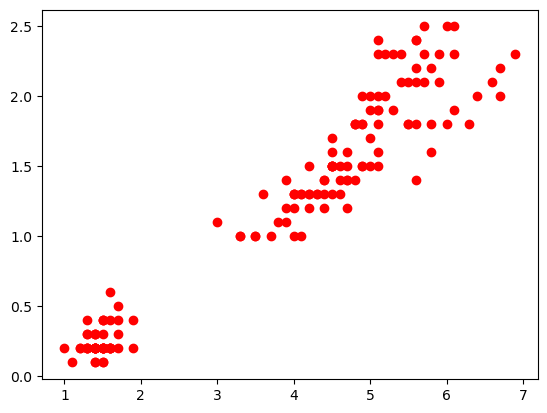

In [16]:
## 무게와 길이의 분포
plt.plot(length, width,'or')
plt.show()

- 탐색적 데이터 분석 결과
    - 데이터 분포 분석: 길이에 따른 너비가 증가하는 양상 보임
    - 주의 : 품종에 따라서 길이가 모여 있음.


[3] 데이터셋 준비
- 학습용 데이터셋 : 학습에만 사용되는 데이터셋 => 해당 데이터셋에서 피쳐와 타겟의 규칙/패턴 찾기
- 검증용 데이터셋 : 학습 중 규칙/패턴 제대로 학습 여부 검사용
- 테스트용 데이터셋 : 모델 완성 후 테스트용 데이터셋
- scikit-learn 패키지 특성으로 학습용과 테스트용만 사용

In [17]:
## 3-1 피처와 타겟 분리
featureDF = length
targetSR = width
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [18]:
## 학습용 : 테스트용 = 7:3
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape}, / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (112, 1) / X_test => 2D, (38, 1)
y_train => 1D (112,), / y_test => 2D, (38,)


In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [0.41794253]
lr.intercept_ -0.3706155959094948
X_train = 0.4179425250701635*y_train + -0.3706155959094948


In [20]:

pre_y = lr.predict(X_train)
score = lr.score(X_train, pre_y)
rmse = root_mean_squared_error(y_train, pre_y)

print(f"{score}, {rmse}")

1.0, 0.20030000303225326
